## **Topic Modeling using NMF(Non Matrix Factorization)**
* Setp 1: get the data and create a correct column and row 
* step 2: for topic modeling manual preprocessing must so using **TFIDF vectorizer**(text -> no's)
* step 3: Then import NMF find the topic from the input data
* Step 4: Now print the 5rows main topics used in each rows
* Step 5: create new column df['Topic'] and merge the results to table 

### **Step 1**

In [1]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv("mabel.txt",header=None,on_bad_lines='skip',encoding='utf8')
df = df.drop(0)
df.columns=['Date','chat']

In [5]:
#take chat column,use split method and n=1 is split only first -,expand
message = df['chat'].str.split("-",n=1,expand=True)
# now merge time  column to df
df['Time']=message[0]
#again split hte chat column now with message[1] name
message1 = message[1].str.split(":",n=1,expand=True)
df['Name']=message1[0]
df['Chat']=message1[1]
print(df.columns.tolist())

['Date', 'chat', 'Time', 'Name', 'Chat']


In [9]:
df = df[['Date','Time','Name','Chat']]

In [11]:
df.head()

,Date,Time,Name,Chat
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K
4,05/12/19,1:42 pm,Mabel Infoziant,Ok
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com


In [28]:
df.Chat.head()

1     Hi this is Mabel we just spoke
2              What’s your full name
3                     Ramisha Rani K
4                                 Ok
5             ramisharanik@gmail.com
Name: Chat, dtype: object

### **Step 2**

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
tfidf = TfidfVectorizer(max_df=0.95,min_df=2,stop_words="english")
dtm = tfidf.fit_transform(df['Chat'])

### **Step 3**

In [32]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=5,random_state=22)
nmf_model.fit(dtm)

NMF(n_components=5, random_state=22)

## Step 4: Now print the 5rows main topics used in each rows

In [37]:
for index,topic in enumerate(nmf_model.components_):
    results=([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print(results)

['share', 'soon', 'ask', 'yes', 'sure', 'read', 'abstract', 'kk', 'yeah', 'mam']
['hi', 'kk', 'know', 'meeting', 'yes', 'just', 'send', 'tomorrow', 'mam', 'ok']
['details', 'start', 'abstracts', 'students', 'phone', 'ask', 'office', 'number', 'vignesh', 'send']
['ask', 'abstracts', 'number', 'mam', 'office', 'know', 'just', 'tomorrow', 'church', 'hi']
['students', 'know', 'sure', 'share', 'soon', 'meeting', 'details', 'yes', 'need', 'ramisha']


## Step 5: create new column df['Topic'] and merge the results to table

In [46]:
topic_results = nmf_model.transform(dtm)
df['Topic']=topic_results.argmax(axis=1)

In [48]:
df

,Date,Time,Name,Chat,Topic
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,3
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,0
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K,4
4,05/12/19,1:42 pm,Mabel Infoziant,Ok,1
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,0
6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?,0
7,05/12/19,1:43 pm,AR❤,Yes Mam,4
8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working,2
9,05/12/19,1:43 pm,AR❤,Yeah mam,0
10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too,0


### Purpose of **Word Cloud** 
- Goal	Description
* 📈 Visual Summary	Helps spot key themes or topics quickly.
* 🧹 Exploratory Analysis	Used in EDA (exploratory data analysis) to inspect text before preprocessing.
* 🧠 Intuition	Provides intuition about what the text is mainly about.
* 📢 Communication	Good for presentations to non-technical audiences.

*🧾 Example Use Cases
* 📢 Twitter hashtags frequency
* 🛍️ Common words in customer reviews
* 🗳️ Frequently mentioned words in political speeches
* 📰 Topics from a news article dataset

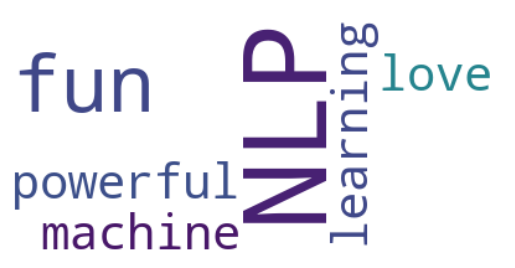

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "NLP is fun. NLP is powerful. I love NLP and machine learning!"

wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### 🧠 How It Works Behind the Scenes
* Text Tokenization – Splits the text into words.

* Word Frequency Count – Counts how often each word appears.

* Scaling – Words with higher counts are shown in larger font.

* Plotting – Randomly places words in a cloud-like shape.